In [1]:
%matplotlib widget

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import statsmodels.api as sm
from matplotlib import cm
import matplotlib as mpl
plt.style.use('presentation.mplstyle')


In [2]:
path_root = r"/scratch-shared/amftrack/transport/csv_new/"

paths = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
table = pd.DataFrame()
for path in paths:
    table = pd.concat([table,pd.read_csv(os.path.join(path_root,path))])

In [8]:
path_root = r"/scratch-shared/amftrack/transport/csv_spores/"

paths = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
table_spores = pd.DataFrame()
for path in paths:
    table_spores = pd.concat([table_spores,pd.read_csv(os.path.join(path_root,path))])

In [10]:
table_spores['days'] = table_spores['time_since_crossing']/pd.Timedelta(days=1)
table_spores['3days'] = (table_spores['time_since_crossing']/pd.Timedelta(days=3)).astype(int)


In [11]:
table['days'] = table['time_since_crossing']/pd.Timedelta(days=1)
table['3days'] = (table['time_since_crossing']/pd.Timedelta(days=3)).astype(int)
table['days_since_first_image'] = table['days'] - table.groupby('unique_id')['days'].transform('min')
table['abs_speed-'] = -table['speed-']

table['speed'] = table[['speed+','abs_speed-']].max(1)
table['lengthdm'] = (np.log2((table['tot_length']))/2).astype(int)*2
table['log_tot_num_spores'] = (np.log10((table['tot_num_spore']))).astype(int)



In [20]:
table.loc[table['unique_id']=="799_20211001"]['days'].unique()

array([ 9.49930556,  7.34652778,  8.36319444,  6.35208333, 10.33472222])

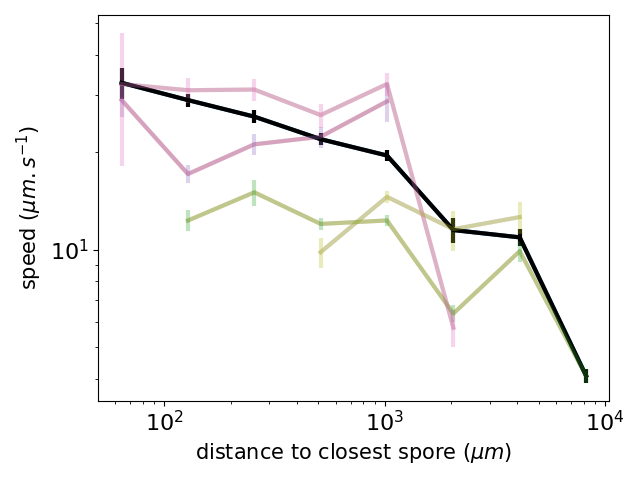

In [16]:
fig,ax = plt.subplots()
select = table.loc[table['spore_distance']>=0].copy()
select = select.loc[select['tot_num_spore']>=10].copy()
select['spore_distance_log'] = (np.log2((select['spore_distance']))).astype(int)
select = select.loc[select['speed+'].between(1,50)]
select = select.loc[select['speed-'].between(-50,-1)]
# ax.scatter(select['days'],select['speed'],alpha =0.1)
mean = select.groupby('spore_distance_log')["speed"].quantile(0.9)
std = select.groupby('spore_distance_log')["speed"].std()
count = select.groupby('spore_distance_log')["speed"].count()
ax.plot(2**mean.index,mean)
ax.errorbar(2**mean.index,mean,std/np.sqrt(count),color= "black")
for unique_id in select['unique_id'].unique():
    sub_select = select.loc[select['unique_id']==unique_id]
    mean = sub_select.groupby('spore_distance_log')["speed"].quantile(0.9)
    std = sub_select.groupby('spore_distance_log')["speed"].std()
    count = sub_select.groupby('spore_distance_log')["speed"].count()
    ax.plot(2**mean.index,mean,alpha = 0.3)
    ax.errorbar(2**mean.index,mean,std/np.sqrt(count),alpha = 0.3)
ax.set_xlabel('distance to closest spore ($\mu m$)')
ax.set_ylabel('speed ($\mu m.s^{-1}$)')
# ax.set_ylim(0,20)
ax.set_yscale('log')
ax.set_xscale('log')


plt.tight_layout()

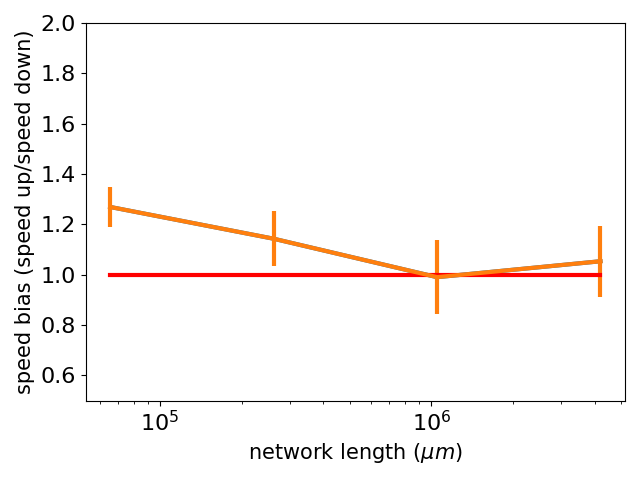

In [24]:
fig,ax = plt.subplots()
table['bias']=-table['speed+']/table['speed-']
table['bias'] = table['bias'].replace(np.inf,1)
table['bias'] = table['bias'].replace(-np.inf,1)
select = table.loc[table['bias']<5]
# ax.scatter(select['3days'],select['bias'],alpha =0.1)
ax.set_ylim(0.5,2)
mean = select.groupby('lengthdm')["bias"].median()
std = select.groupby('lengthdm')["bias"].std()
count = select.groupby('lengthdm')["bias"].count()
ax.plot(2**mean.index,mean)
ax.errorbar(2**mean.index,mean,2*std/np.sqrt(count))
ax.set_xlabel('network length ($\mu m$)')
ax.set_ylabel('speed bias (speed up/speed down)')
ax.plot(2**mean.index,1+mean.index*0,color='red')
ax.set_xscale('log')
plt.tight_layout()

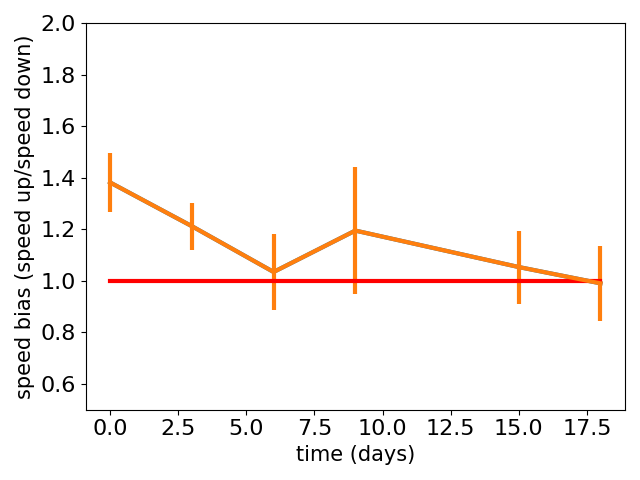

In [35]:
fig,ax = plt.subplots()
table['bias']=-table['speed+']/table['speed-']
table['bias'] = table['bias'].replace(np.inf,1)
table['bias'] = table['bias'].replace(-np.inf,1)
select = table.loc[table['bias']<5]
# ax.scatter(select['3days'],select['bias'],alpha =0.1)
ax.set_ylim(0.5,2)
mean = select.groupby('3days')["bias"].median()
std = select.groupby('3days')["bias"].std()
count = select.groupby('3days')["bias"].count()
ax.plot(mean.index*3,mean)
ax.errorbar(mean.index*3,mean,2*std/np.sqrt(count))
ax.set_xlabel('time (days)')
ax.set_ylabel('speed bias (speed up/speed down)')
ax.plot(mean.index*3,1+mean.index*0,color='red')

plt.tight_layout()

In [91]:
# fig,ax = plt.subplots()
# table['bias']=-table['speed+']/table['speed-']
# table['bias'] = table['bias'].replace(np.inf,1)
# table['bias'] = table['bias'].replace(-np.inf,1)
# select = table.loc[table['bias']<5]
# # ax.scatter(select['3days'],select['bias'],alpha =0.1)
# ax.set_ylim(0.5,2)
# mean = select.groupby('speed')["bias"].median()
# std = select.groupby('speed')["bias"].std()
# count = select.groupby('speed')["bias"].count()
# ax.plot(mean.index*3,mean)
# ax.errorbar(mean.index*3,mean,2*std/np.sqrt(count))
# ax.set_xlabel('time (days)')
# ax.set_ylabel('speed bias (speed up/speed down)')
# ax.plot(mean.index*3,1+mean.index*0,color='red')

# plt.tight_layout()

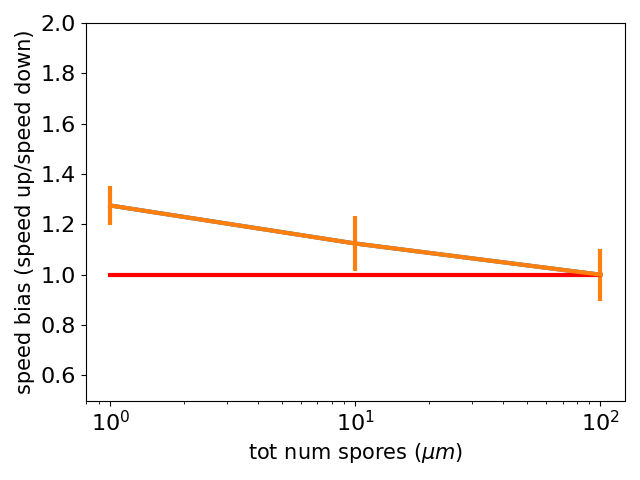

In [55]:
fig,ax = plt.subplots()
table['bias']=-table['speed+']/table['speed-']
table['bias'] = table['bias'].replace(np.inf,1)
table['bias'] = table['bias'].replace(-np.inf,1)
select = table.loc[table['bias']<5]
# ax.scatter(select['3days'],select['bias'],alpha =0.1)
ax.set_ylim(0.5,2)
mean = select.groupby('log_tot_num_spores')["bias"].median()
std = select.groupby('log_tot_num_spores')["bias"].std()
count = select.groupby('log_tot_num_spores')["bias"].count()
ax.plot(10**mean.index,mean)
ax.errorbar(10**mean.index,mean,2*std/np.sqrt(count))
ax.set_xlabel('tot num spores ($\mu m$)')
ax.set_ylabel('speed bias (speed up/speed down)')
ax.plot(10**mean.index,1+mean.index*0,color='red')
ax.set_xscale('log')
plt.tight_layout()

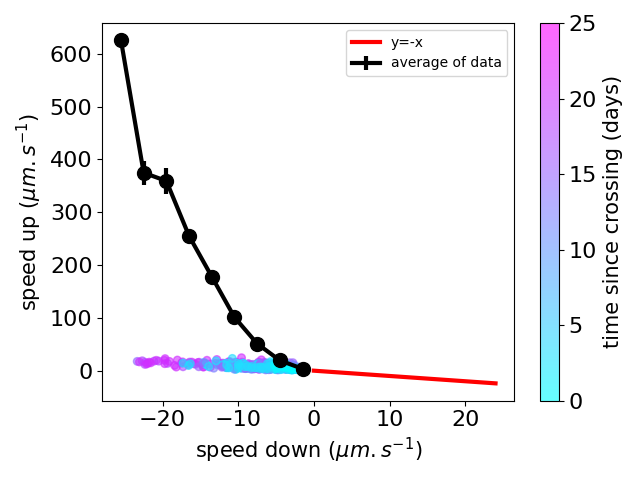

In [87]:
fig,ax = plt.subplots()
cmap=cm.get_cmap("cool", 100)

select = table.loc[table['speed+'].between(1,25)]
select = select.loc[select['speed-'].between(-25,-1)]
max_day = 25
norm = mpl.colors.Normalize(vmin=0, vmax=max_day)

scatter = ax.scatter(select['speed-'],select['speed+'],c=select['days'],cmap ="cool",alpha = 0.6,norm=norm,s=30)
group_size = 3
select['speed-group'] = (select['speed'].replace(-np.inf,0)/group_size).astype(int)*group_size
group = select.groupby('speed-group')['speed+'].median()
# ax.plot(group.index,group,color='black')
std_bias = select.groupby('speed-group')['speed+'].std()
count_bias = select.groupby('speed-group')['speed+'].count()
statistic = make_stat(group.index,ax)
data = np.array((group.index,group))
n_resamples = 100
# std = scipy.stats.bootstrap(data,statistic,
#                             vectorized = False,
#                             method="basic",
#                             n_resamples = n_resamples,
#                             paired= True).standard_error
ax.scatter(-group.index-group_size/2,(group.index+group_size/2)*group, color="black")

ax.errorbar(-group.index-group_size/2,(group.index+group_size/2)*group, (group.index+group_size/2)*std_bias/np.sqrt(count_bias),color="black",label='average of data')
ax.plot(group.index,-group.index,color='red',label="y=-x")
ax.set_xlabel("speed down ($\mu m.s^{-1}$)")
ax.set_ylabel("speed up ($\mu m.s^{-1}$)")
ax.legend()
fig.colorbar(scatter,label="time since crossing (days)",ax=ax)
plt.tight_layout()


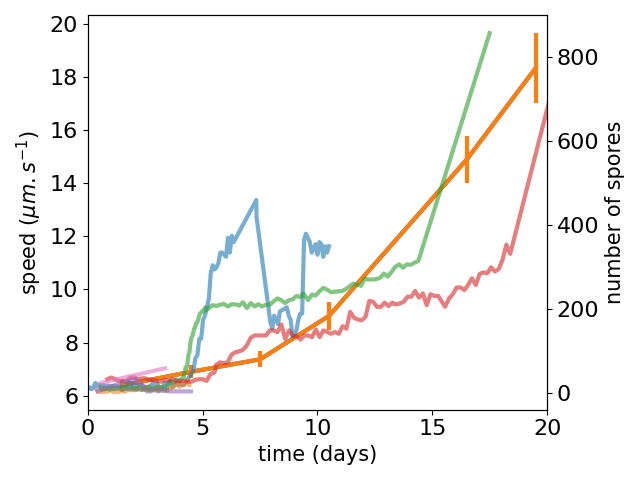

In [15]:
fig,ax = plt.subplots()
# select = table.loc[table.groupby('unique_id')['days_since_first_image'].transform('max')>0]
# select = select.loc[select['unique_id']=="803_20211012"]
select = table.loc[table['speed+'].between(1,50)]
select = select.loc[select['speed-'].between(-50,-1)]
# ax.scatter(select['days'],select['speed'],alpha =0.1)
mean = select.groupby('3days')["speed"].mean()
std = select.groupby('3days')["speed"].std()
count = select.groupby('3days')["speed"].count()
ax.plot(3*mean.index+1.5,mean)
ax.errorbar(3*mean.index+1.5,mean,std/np.sqrt(count))
ax.set_xlabel('time (days)')
ax.set_ylabel('speed ($\mu m.s^{-1}$)')
ax2 = ax.twinx()
# ax2.scatter(table['days'],table['tot_num_spore'])
for unique_id in table['unique_id'].unique():
    select_spores = table_spores.loc[table_spores['unique_id']==unique_id]
    average = select_spores.groupby('days')['x'].count()
    ax2.plot(average.index,average,alpha = 0.6,label=unique_id)
ax.set_xlim(0,20)
# ax2.set_yscale('log')
# ax.set_yscale('log')
ax2.set_ylabel('number of spores')
# plt.legend()
plt.tight_layout()

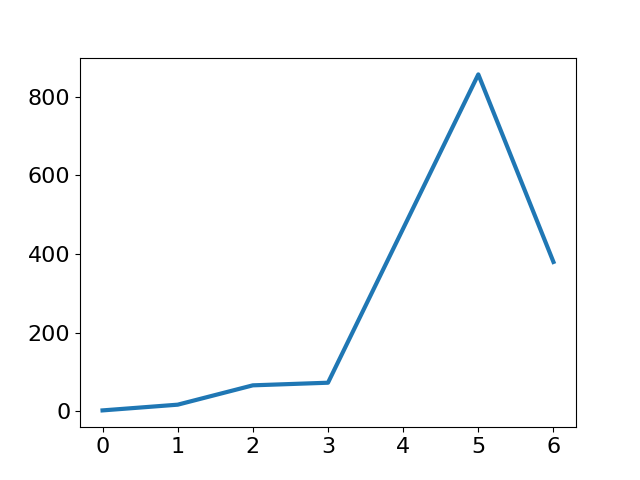

In [17]:
fig,ax = plt.subplots()
select = table.loc[table['speed+'].between(1,50)]
select = select.loc[select['speed-'].between(-50,-1)]
# ax.scatter(select['days'],select['speed'],alpha =0.1)
mean = select.groupby('3days')["tot_num_spore"].mean()
std = select.groupby('3days')["tot_num_spore"].std()
count = select.groupby('3days')["tot_num_spore"].count()
ax.plot(mean.index,mean)
# ax.errorbar(mean.index,mean,std/np.sqrt(count))

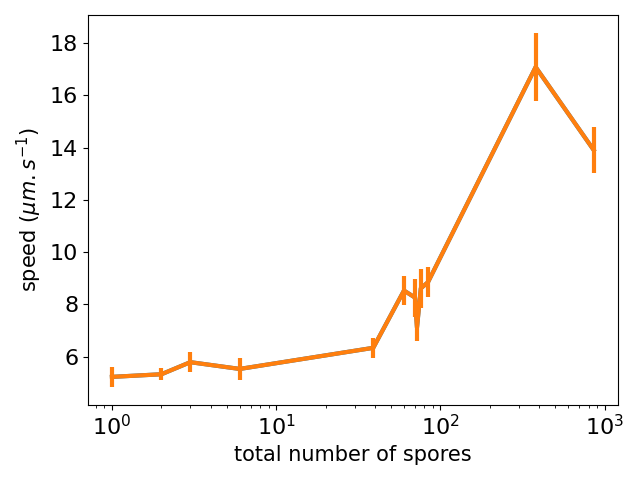

In [18]:
fig,ax = plt.subplots()
# select = table.loc[table.groupby('unique_id')['days_since_first_image'].transform('max')>0]
# select = select.loc[select['unique_id']=="803_20211012"]
select = table.loc[table['speed+'].between(1,50)]
select = select.loc[select['speed-'].between(-50,-1)]
# ax.scatter(select['tot_num_spore'],select['speed'],alpha =0.1)
mean = select.groupby('tot_num_spore')["speed"].median()
percentile = select.groupby('tot_num_spore')["speed"].quantile(0.9)

std = select.groupby('tot_num_spore')["speed"].std()
count = select.groupby('tot_num_spore')["speed"].count()
ax.plot(mean.index,mean)
# ax.plot(mean.index,percentile,color="red")

ax.errorbar(mean.index,mean,std/np.sqrt(count))
ax.set_xlabel('total number of spores')
ax.set_ylabel('speed ($\mu m.s^{-1}$)')
# ax.set_ylim(0,50)
ax.set_xscale('log')
# ax.set_yscale('log')

plt.tight_layout()

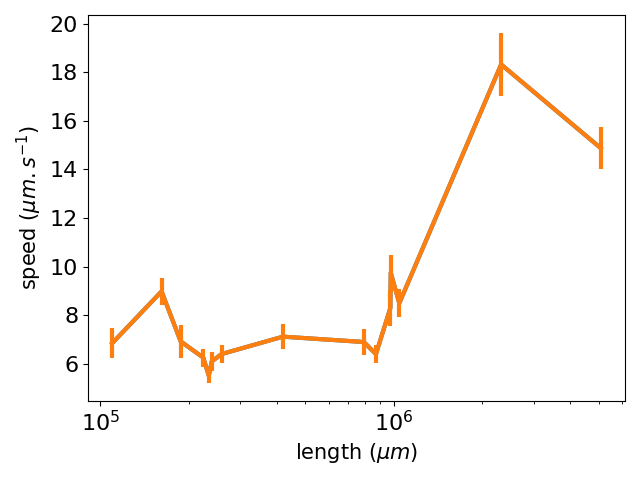

In [102]:
fig,ax = plt.subplots()
# select = table.loc[table.groupby('unique_id')['days_since_first_image'].transform('max')>0]
# select = select.loc[select['unique_id']=="803_20211012"]
select = table.loc[table['speed+'].between(1,50)]
select = select.loc[select['speed-'].between(-50,-1)]
# ax.scatter(select['tot_length'],select['speed'],alpha =0.1)
mean = select.groupby('tot_length')["speed"].mean()
std = select.groupby('tot_length')["speed"].std()
count = select.groupby('tot_length')["speed"].count()
ax.plot(mean.index,mean)
ax.errorbar(mean.index,mean,std/np.sqrt(count))
ax.set_xlabel('length ($\mu m$)')
ax.set_ylabel('speed ($\mu m.s^{-1}$)')
# ax.set_ylim(0,20)
ax.set_xscale('log')
# ax.set_yscale('log')

plt.tight_layout()

In [95]:
import statsmodels.api as sm 
X = select[['tot_num_spore']] 
y = select['speed'] 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     206.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.38e-40
Time:                        16:36:43   Log-Likelihood:                -1959.4
No. Observations:                 619   AIC:                             3923.
Df Residuals:                     617   BIC:                             3932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.2422      0.266     27.229      0.000       6.720       7.765
tot_num_spore     0.0130      0.001     14.367      0.000       0.011       0.015
==============================================================================
Omnibus:                      330.563   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2680.951
Skew:                           2.252   Prob(JB):                         0.00
Kurtosis:                      12.147   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = select[['tot_num_spore']] 
y = select['speed'] 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

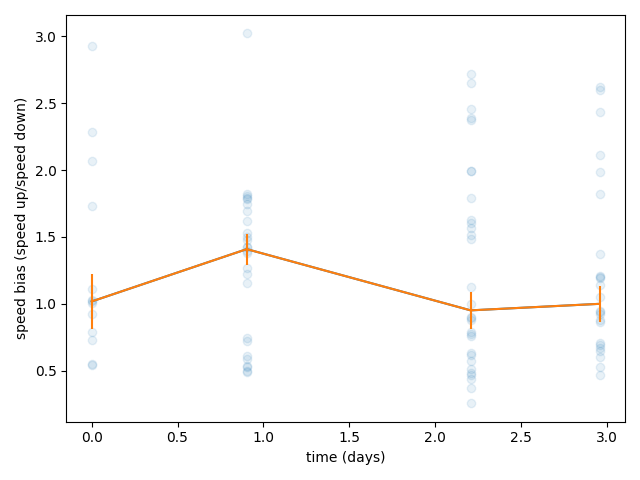

In [52]:
fig,ax = plt.subplots()
select = table.loc[table.groupby('unique_id')['days_since_first_image'].transform('max')>0]
select = select.loc[select['unique_id']=="809_20211012"]
ax.scatter(select['days_since_first_image'],select['bias'],alpha =0.1)
mean = select.groupby('days_since_first_image')["bias"].median()
std = select.groupby('days_since_first_image')["bias"].std()
count = select.groupby('days_since_first_image')["bias"].count()
ax.plot(mean.index,mean)
ax.errorbar(mean.index,mean,std/np.sqrt(count))
ax.set_xlabel('time (days)')
ax.set_ylabel('speed bias (speed up/speed down)')
plt.tight_layout()

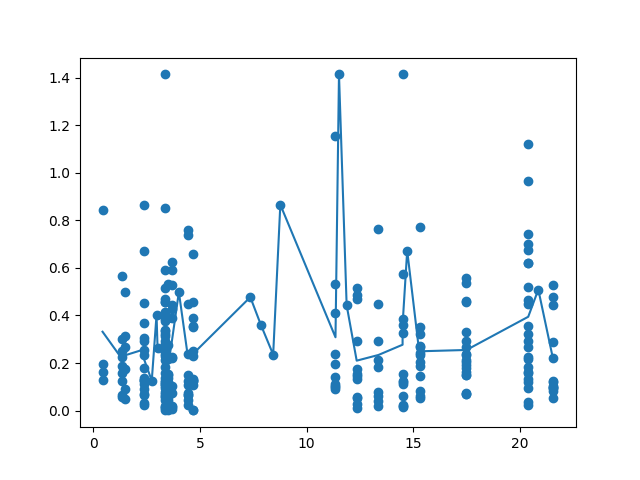

In [8]:
fig,ax = plt.subplots()
std = table.groupby(['posy'])['speed+'].std()
mean = table.groupby(['posy'])['speed+'].mean()
count = table.groupby(['posy'])['speed+'].count()
days_columns = table.groupby(['posy'])['days'].mean()
grouping = 3
column=(mean/grouping).astype(int)*grouping
dataf = pd.DataFrame(mean)
dataf['speed_int'] = column
dataf['days'] = days_columns

dataf['CV'] = std/mean

average = dataf.groupby('days')['CV'].mean()
ax.scatter(days_columns,std/mean)
ax.plot(average.index,average)

KeyError: 'tot_num_spore'

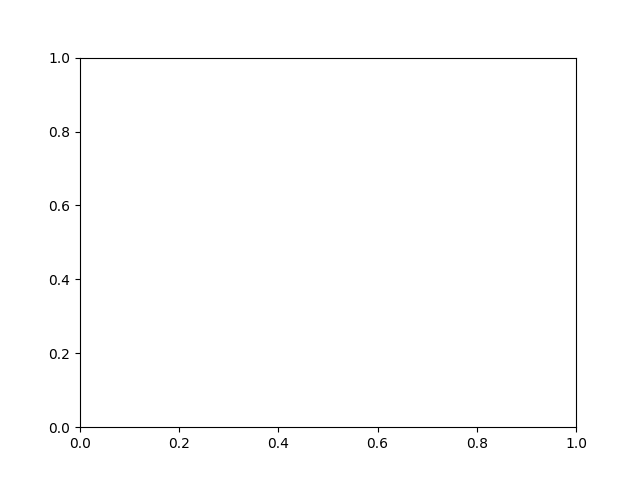

In [9]:
fig,ax = plt.subplots()
ax.scatter(table['tot_num_spore'],table[f"speed"],alpha = 0.1)
group = table.groupby('tot_num_spore')['speed'].median()
ax.plot(group.index,group)
group_error = table.groupby('tot_num_spore')['speed'].std()
group_count = table.groupby('tot_num_spore')['speed'].count()

ax.errorbar(group.index,group, group_error/np.sqrt(group_count))
ax.set_xlabel('number of spores')
ax.set_ylabel('max speed ($\mu m.s^{-1}$)')
ax.set_yscale('log')
ax.set_ylim(2,100)
plt.tight_layout()

In [14]:
column = table['speed+']+table['speed-']
column = column.replace(np.inf,0)
column = column.replace(-np.inf,0)

np.mean(column),np.std(column)/np.sqrt(len(column))

(-0.05448060903426778, 0.536651903223975)

In [47]:
def make_stat(x0,ax):
    def statistic(x,y):
        # X = sm.add_constant(x, prepend=False)
        X = x
        model = sm.OLS(y,X)
        res = model.fit()
        a = res.params[0]
        ax.plot(x0,np.array(x0)*a,color = 'grey', alpha = 0.01)
        return(a)
    return(statistic)

(array([ 48., 229., 157.,  71.,  55.,  38.,  18.,   9.,   3.,   6.,   4.,
          3.,   3.,   2.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 0.     ,  2.71685,  5.4337 ,  8.15055, 10.8674 , 13.58425,
        16.3011 , 19.01795, 21.7348 , 24.45165, 27.1685 , 29.88535,
        32.6022 , 35.31905, 38.0359 , 40.75275, 43.4696 , 46.18645,
        48.9033 , 51.62015, 54.337  ]),
 <BarContainer object of 20 artists>)

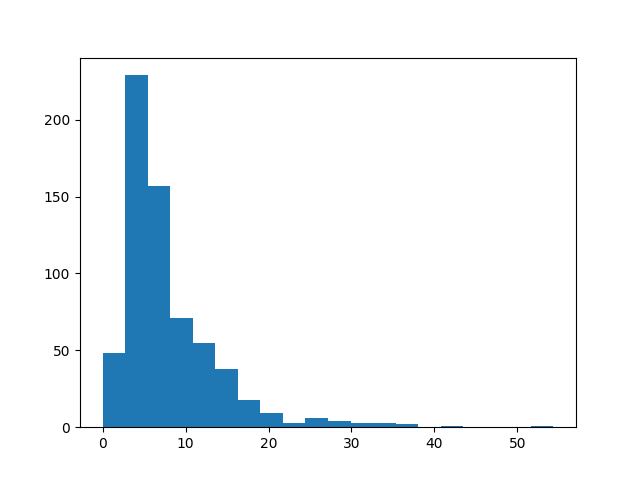

In [53]:
fig,ax = plt.subplots()
ax.hist(table['speed+'],20)

In [10]:
# grouping_window_mult = 13
# table['group_density'] = (table[f"spore_density_{size}"]*grouping_window_mult).astype(int)
size = 1000
table['group_density'] = table[f"spore_density_num_{size}"]
speedp = table.groupby('group_density')['speed+'].median()
speedm = table.groupby('group_density')['speed-'].median()
speedp_error = table.groupby('group_density')['speed+'].std()
speedp_count = table.groupby('group_density')['speed+'].count()

speedm = table.groupby('group_density')['speed-'].median()
speedm_error = table.groupby('group_density')['speed-'].std()
speedm_count = table.groupby('group_density')['speed-'].count()

# space_pixel_size = 1.725
speedp.index 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='group_density')

Text(0, 0.5, 'maximum speeds ($\\mu m.s^{-1}$)')

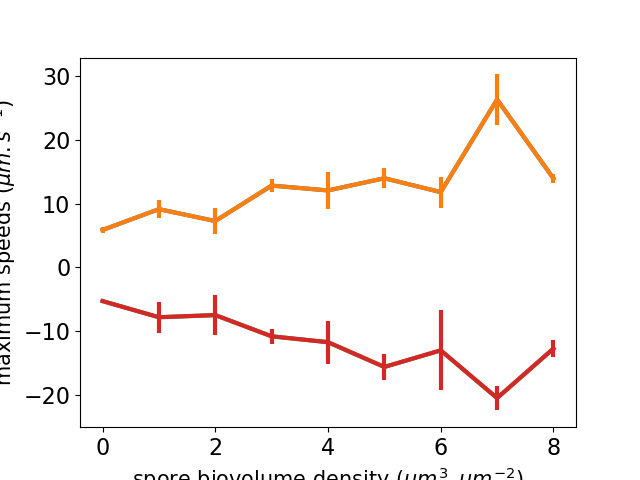

In [11]:
fig,ax = plt.subplots()
# ax.scatter(table["group_density"]/grouping_window_mult/space_pixel_size**2,table['speed-'])
ax.plot(speedp.index,speedp)
ax.errorbar(speedp.index,speedp,speedp_error/np.sqrt(speedp_count))
ax.plot(speedp.index,speedm)
ax.errorbar(speedp.index,speedm,speedm_error/np.sqrt(speedm_count))
ax.set_xlabel('spore biovolume density ($\mu m^{3}.\mu m^{-2}$)')
ax.set_ylabel('maximum speeds ($\mu m.s^{-1}$)')



In [72]:
table['speed']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: speed, Length: 260, dtype: float64

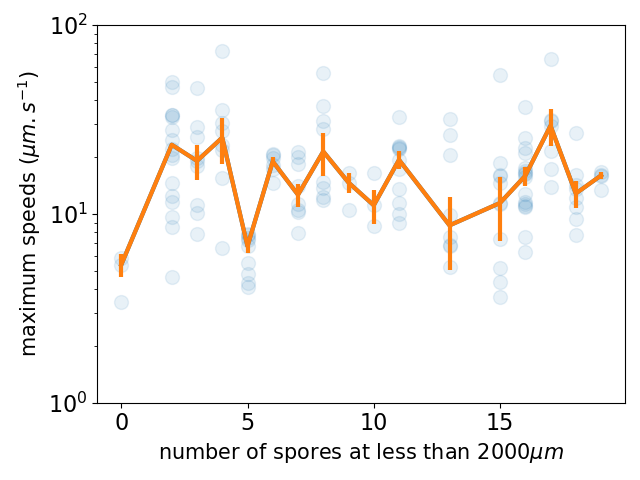

In [12]:
size = 2000
table['group_density'] = table[f"spore_density_num_{size}"]
table['abs_speed-'] = -table['speed-']
table['speed'] = table[['speed+','abs_speed-']].max(1)
select = table.loc[table['tot_num_spore']>=200]
speed = select.groupby('group_density')['speed'].median()
speed_error = select.groupby('group_density')['speed'].std()
speed_count = select.groupby('group_density')['speed'].count()
fig,ax = plt.subplots()
ax.scatter(select[f"spore_density_num_{size}"],select[f"speed"],alpha = 0.1)

# ax.scatter(table["group_density"]/grouping_window_mult/space_pixel_size**2,table['speed-'])
ax.plot(speed.index,speed)
ax.errorbar(speed.index,speed,speed_error/np.sqrt(speed_count))
# ax.plot(speedp.index,speedm)
# ax.errorbar(speedp.index,speedm,speedm_error/np.sqrt(speedm_count))
ax.set_xlabel(f'number of spores at less than {size}$\mu m$')
ax.set_ylabel('maximum speeds ($\mu m.s^{-1}$)')
ax.set_yscale('log')
ax.set_ylim(1,100)
plt.tight_layout()